Sascha Spors,
Professorship Signal Theory and Digital Signal Processing,
Institute of Communications Engineering (INT),
Faculty of Computer Science and Electrical Engineering (IEF),
University of Rostock, Germany

Tutorial Digital Signal Processing (Course #24505),
**DFT Fundamentals**,
Winter Semester 2019/20

Feel free to contact lecturer frank.schultz@uni-rostock.de

- lecture: https://github.com/spatialaudio/digital-signal-processing-lecture
- tutorial: https://github.com/spatialaudio/digital-signal-processing-exercises

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv

# Discrete Fourier Transform (DFT)

## Input Signal

Let us first define a complex-valued signal $x[k]$ of a certain block length $N$ ranging from $0\leq k\leq N-1$.

The variable `tmpmu` defines the frequency of the signal. We will see later how this is connected to the DFT.
For now on, leave it with `tmpmu=1`. This results in exactly one period of cosine and sine building the complex signal. If `tmpmu=2` we get exactly two periods of cos/sin. You get an idea of `tmpmu`...

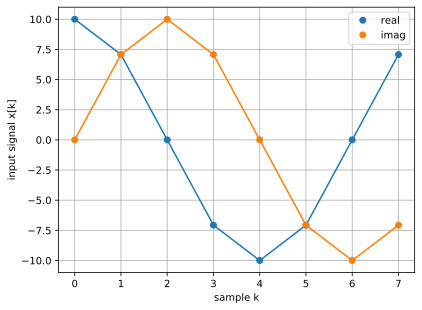

In [2]:
N = 2**3  # signal block length
k = np.arange(0, N)  # all required sample/time indices
A = 10  # signal amplitude
tmpmu = 2-1/2  # DFT eigenfrequency worst case
tmpmu = 1  # DFT eigenfrequency best case
x = A * np.exp(tmpmu * 1j*2*np.pi/N * k)

# plot
plt.plot(k,np.real(x),color='C0')
plt.plot(k,np.real(x),'o',color='C0',label='real')
plt.plot(k,np.imag(x),color='C1')
plt.plot(k,np.imag(x),'o',color='C1',label='imag')
plt.xlabel('sample k')
plt.ylabel('input signal x[k]')
plt.legend()
plt.grid(True)

We will now perform an DFT of $x[k]$ since we are interested in the frequency spectrum of it.

# DFT Definition

The discrete Fourier transform pair for a discrete-time signal $x[k]$ with sample index $k$ and the corresponding DFT spectrum $X[\mu]$ with frequency index $\mu$ is given as 
\begin{align}
\text{DFT}: X[\mu]=&\sum_{k=0}^{N-1}x[k]\cdot\mathrm{e}^{-\mathrm{j}\frac{2\pi}{N}k\mu}\\
\text{IDFT}: x[k]=\frac{1}{N}&\sum_{\mu=0}^{N-1}X[\mu]\cdot\mathrm{e}^{+\mathrm{j}\frac{2\pi}{N}k\mu}
\end{align}

Note the sign reversal in the exp()-function and the $1/N$ normalization in the IDFT. This convention is used by the majority of DSP text books and also in Python's numpy.fft()/ifft() and Matlab's fft()/ifft() routines.

## DFT and IDFT with For-Loops

We now going to implement the DFT and IDFT with for-loop handling. While this might be helpful to validate  algorithms in its initial development phase, please avoid using this as final code in practice: for-loops are almost always much slower processed and very often more complicated to read than appropriate set up matrices and vectors. Especially for very large $N$ computation time is very long.

Anyway, the for-loop concept is: the DFT can be implemented with an outer for loop iterating over $\mu$ and an inner for loop summing over all $k$.

In [3]:
# DFT with for-loop:
X_ = np.zeros((N,1),dtype=complex)  # make sure that vector is init with zeros
for mu_ in range(0,N):  # do for all frequency indices
    for k_ in range(0,N):  # do for all time indices
        X_[mu_] += x[k_] * np.exp(-1j*2*np.pi/N*k_*mu_)

We use variable with _ subscript here, in order to keep nice variables to the matrix notation.

IDFT with outer and inner looping reads as follows.

In [4]:
# IDFT with for-loop:
x_ = np.zeros((N,1),dtype=complex)
for k_ in range(0,N):
    for mu_ in range(0,N):
        x_[k_] += X_[mu_,0] * np.exp(+1j*2*np.pi/N*k_*mu_)
x_ = 1/N*x_

Besides exchanged variables, main differences are sign reversal in exp() and 1/N normalization. This is expected due to the DFT/IDFT equation pair given above.

## Matrix Notation

Now we do better: We should think of the DFT/IDFT in terms of a matrix operation setting up a set of linear equations $\mathbf{X} = \mathbf{W} \mathbf{x}$. The key concept here is that an input vector $\mathbf{x}$ is transformed to an output vector $\mathbf{X}$ with a chosen vector base implemented in $\mathbf{W}$.

For that we build the ($N\times N$) matrix (element-wise)
\begin{equation}
\mathbf{W} = \mathrm{e}^{-\mathrm{j}\frac{2\pi}{N} \mathbf{A}}
\end{equation}
from the so called twiddle factor
\begin{equation}
W = \mathrm{e}^{-\mathrm{j}\frac{2\pi}{N}}
\end{equation}
and from matrix (this is an outer product)
\begin{equation}
\mathbf{A} = 
\begin{bmatrix}
0\\
1\\
2\\
\vdots\\
N-1
\end{bmatrix}
\cdot
\begin{bmatrix}
0 & 1 & 2 & \cdots & N-1
\end{bmatrix}
\end{equation}
containing all possible products $k\,\mu$ in a suitable arrangement.

For the case $N=4$ these matrices look as
\begin{align}
\mathbf{A} = \begin{bmatrix}
0 & 0 & 0 & 0\\
0 & 1 & 2 & 3\\
0 & 2 & 4 & 6\\
0 & 3 & 6 & 9
\end{bmatrix}
\rightarrow
\mathbf{W} = \begin{bmatrix}
1 & 1 & 1 & 1\\
1 & -\mathrm{j} & -1 & \mathrm{j}\\
1 & -1 & 1 & -1\\
1 & \mathrm{j} & -1 & -\mathrm{j}
\end{bmatrix}
\end{align}


In [5]:
#k = np.arange(0, N)  # all required sample/time indices, already defined above
mu = np.arange(0, N)  # all required DFT frequency indices
A = np.outer(mu, k)  # get all possible entries k*mu in meaningful arrangement
W = np.exp(-1j * 2*np.pi/N * A)  # analysis matrix for DFT

## Plot DFT Eigensignals and -Frequencies

The matrix $\mathbf{W}$ contains the eigensignals of the DFT. These are
\begin{align}
w_\mu[k] = \cos(\frac{2\pi}{N} k \mu) - \mathrm{j} \sin(\frac{2\pi}{N} k \mu)
\end{align}
since we have setup the matrix exactly this way.

In the plot below you see the eigensignal for $\mu=1$, which fits again one period in the block length.
For $\mu=2$ we obtain two periods in one block.

The eigensignals for $0\leq \mu \leq N-1$ therefore have a certain digital frequency, the so called DFT eigenfrequencies.

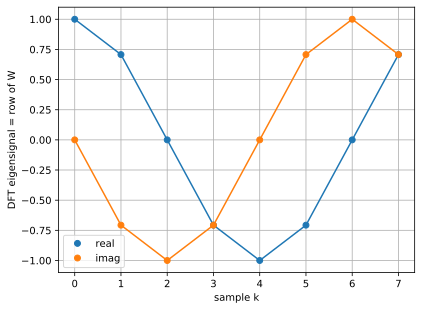

In [6]:
tmpmu = 1
plt.plot(k,np.real(W[tmpmu,:]),color='C0')
plt.plot(k,np.real(W[tmpmu,:]),'o',color='C0',label='real')
plt.plot(k,np.imag(W[tmpmu,:]),color='C1')
plt.plot(k,np.imag(W[tmpmu,:]),'o',color='C1',label='imag')
plt.xlabel('sample k')
plt.ylabel('DFT eigensignal = row of W')
plt.legend()
plt.grid(True)

The nice thing about the chosen eigenfrequencies, is that the eigensignals are **orthogonal**. This choice of the vector basis is on purpose!! We might for example check this with the **complex** inner product of the matrix columns.

In [7]:
np.dot(np.conj(W[:,0]),W[:,0])  # same eigensignal, same eigenfrequency
# np.vdot(W[:,0],W[:,0])

(8+0j)

In [8]:
np.dot(np.conj(W[:,0]),W[:,1])  # different eigensignals, different eigenfrequencies
# np.vdot(W[:,0],W[:,1])

(-4.440892098500626e-16+2.220446049250313e-16j)

## DFT of Input Signal

We just need one matrix operation to perform DFT

\begin{equation}
\begin{bmatrix}X[\mu=0]\\X[\mu=1]\\X[\mu=2]\\\vdots\\X[\mu=N-1]\end{bmatrix}=\mathbf{W}\,\begin{bmatrix}x[k=0]\\x[k=1]\\x[k=2]\\\vdots\\x[k=N-1]\end{bmatrix}\rightarrow\mathbf{X} = \mathbf{W}\,\mathbf{x}
\end{equation}


In [9]:
X = np.matmul(W,x)  # DFT, i.e. analysis

Let us check if this result is consistent with the for-loop implementation

In [10]:
np.max(np.abs(np.real(X_[:,0]-X)))  # real part of difference

4.440892098500626e-15

In [11]:
np.max(np.abs(np.imag(X_[:,0]-X)))  # imag part of difference

2.6645352591003757e-15

This looks good. It is advisable also to check against the `numpy.fft` implementation:

In [12]:
np.max(np.abs(np.real(np.fft.fft(x) - X)))

1.7763568394002505e-14

In [13]:
np.max(np.abs(np.imag(np.fft.fft(x) - X)))

1.92134870040093e-14

Besides different quantization errors in range $10^{-15...-16}$ (which is prominent even with 64Bit double precision calculation)
all results produce the same output.

## Plot the DFT Magnitude Spectrum

Next, let us plot the magnitude of the spectrum over $\mu$.

- We should play around with the variable `tmpmu` when defining the input signal at the very beginning of the notebook. For example we can check what happens for `tmpmu = 1`, `tmpmu = 2` and run the whole notebook to visualize the actual magnitude spectra.

We should recognize the link of the 'energy' at $\mu$ in the magnitude spectrum with the chosen `tmpmu`.

- We can apply any real valued `tmpmu` for creating the input signal, for example
    - `tmpmu = N+1`, `tmpmu = N+2`
    - `tmpmu = 1.5`
    
We should explain what happens in these cases. Recall periodicity and eigenfrequencies/-signals as fundamental concepts.

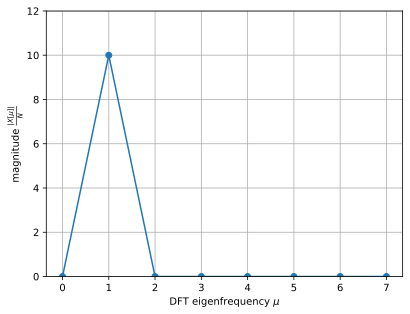

In [14]:
plt.plot(mu,np.abs(X)/N, color='C0')
plt.plot(mu,np.abs(X)/N,'o',color='C0')
plt.ylim(0,12)
plt.xlabel(r'DFT eigenfrequency $\mu$')
plt.ylabel(r'magnitude $\frac{|X[\mu]|}{N}$')
plt.grid(True)

# IDFT of  Spectrum

The inverse operation of
\begin{equation}
\mathbf{X} = \mathbf{W} \mathbf{x}
\end{equation}
is
\begin{equation}
\mathbf{x} = \mathbf{W}^{-1} \mathbf{X}
\end{equation}
if the matrix inverse is existing, which holds for DFT matrix. So we could immediately use

In [15]:
xr1 = np.matmul(inv(W),X)  # IDFT, i.e. synthesis

to perform an IDFT. However, for the complex, symmetric and square DFT matrix, things can be simplified a lot and by that we gain insights.
For DFT matrices 
\begin{equation}
\mathbf{W}^{-1} = \frac{1}{N} \mathbf{W}^*
\end{equation}
holds, denoting conjugate-complex operation by $(\cdot)^*$.
If we compare with the DFT/IDFT pair
\begin{align}
\text{DFT}: X[\mu]=&\sum_{k=0}^{N-1}x[k]\cdot\mathrm{e}^{-\mathrm{j}\frac{2\pi}{N}k\mu}\\
\text{IDFT}: x[k]=\frac{1}{N}&\sum_{\mu=0}^{N-1}X[\mu]\cdot\mathrm{e}^{+\mathrm{j}\frac{2\pi}{N}k\mu}
\end{align}
we see the strong links.

So, the IDFT can be obtained by the set of linear equations
\begin{equation}
\mathbf{x} = \frac{1}{N}\mathbf{W}^{*} \mathbf{X}
\end{equation}

In [16]:
xr2 = np.matmul(1/N*np.conj(W),X) # IDFT, i.e. synthesis

Again, checking for proper implementation

In [17]:
np.max(np.abs(np.real(x-xr2)))

4.440892098500626e-15

In [18]:
np.max(np.abs(np.imag(x-xr2)))

5.329070518200751e-15

In [19]:
np.max(np.abs(np.real(np.fft.ifft(X)-xr2)))

2.6645352591003757e-15

In [20]:
np.max(np.abs(np.imag(np.fft.ifft(X)-xr2)))

1.7763568394002505e-15

Analysis and subsequent synthesis must yield the input signal again, as
\begin{equation}
\mathbf{x} = \mathbf{W}^{-1} (\mathbf{W} \mathbf{x}) = (\mathbf{W}^{-1} \mathbf{W}) \mathbf{x}
\end{equation}
due to $\mathbf{W}^{-1} \mathbf{W} = \mathbf{I}$.

For the DFT matrix this can be restated to
\begin{equation}
\mathbf{x} = \frac{1}{N}\mathbf{W}^{*} (\mathbf{W} \mathbf{x}) = (\frac{1}{N}\mathbf{W}^{*} \mathbf{W}) \mathbf{x}
\end{equation}
due to $\frac{1}{N}\mathbf{W}^{*} \mathbf{W} = \mathbf{I}$.

If we move the $1/N$ term to another normalizing scheme, such as defining $(\mathbf{W}^{*}/\sqrt{N})$ and $(\mathbf{W}/\sqrt{N})$.
Both matrices are so called unitary matrices, a beautiful special case of orthonormal, complex, square, symmetric matrices where the inverse is equal to the conjugate-complex and $(\mathbf{W}^{*}/\sqrt{N}) (\mathbf{W}/\sqrt{N})= \mathbf{I}$ holds.

As said above, it's all about using the most appropriate vector base for solving a problem.

**Copyright**

The notebooks are provided as [Open Educational Resources](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebooks for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Frank Schultz, Digital Signal Processing - A Tutorial Featuring Computational Examples* with the URL https://github.com/spatialaudio/digital-signal-processing-exercises